**ITDS Final Project // Artin Ahmeti (L651AV)**

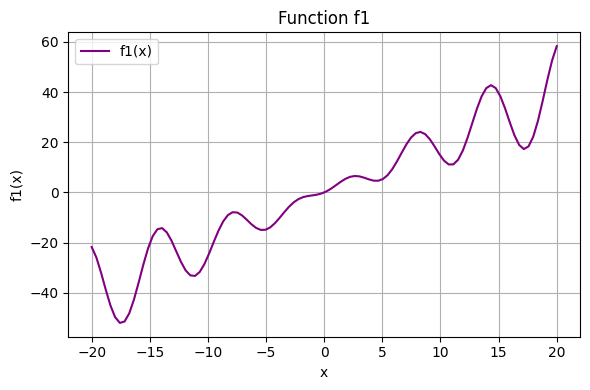

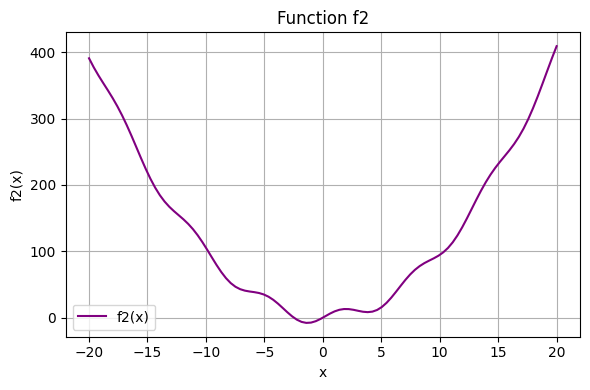

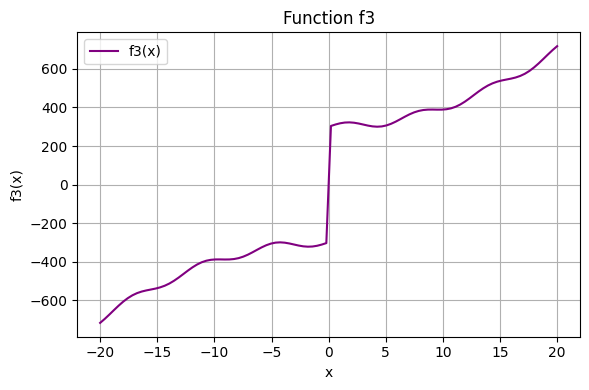

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def f1(x):
    return x * np.sin(x) + 2 * x

def f2(x):
    return 10 * np.sin(x) + x**2

def f3(x):
    return np.sign(x) * (x**2 + 300) + 20 * np.sin(x)

def generate_dataset(f):
    tr = 20
    n_samples = 100
    X = np.linspace(-tr, tr, n_samples).reshape(-1, 1)
    y = f(X).ravel()

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.7, random_state=42, shuffle=True
    )

    y_test = y_test[np.argsort(X_test.ravel())]
    X_test = np.sort(X_test.ravel()).reshape(-1, 1)

    return X_train, X_test, y_train, y_test, X, y

for i, f in enumerate([f1, f2, f3], 1):
    X_train, X_test, y_train, y_test, X, y = generate_dataset(f)

    plt.figure(figsize=(6, 4))
    plt.plot(X, y, label=f'f{i}(x)', color='purple')
    plt.title(f'Function f{i}')
    plt.xlabel('x')
    plt.ylabel(f'f{i}(x)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


----- Function f1 -----


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


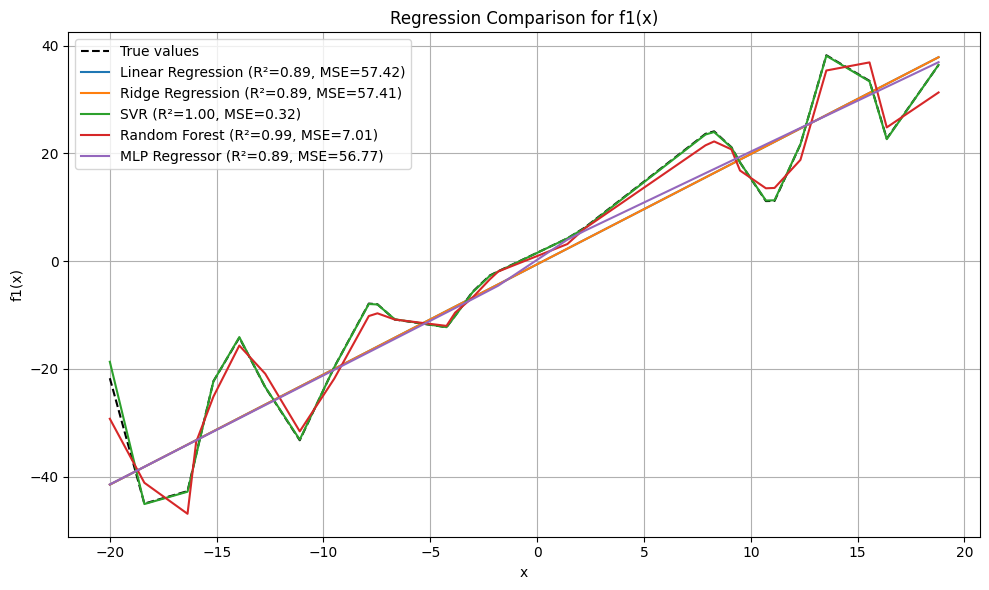


----- Function f2 -----


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


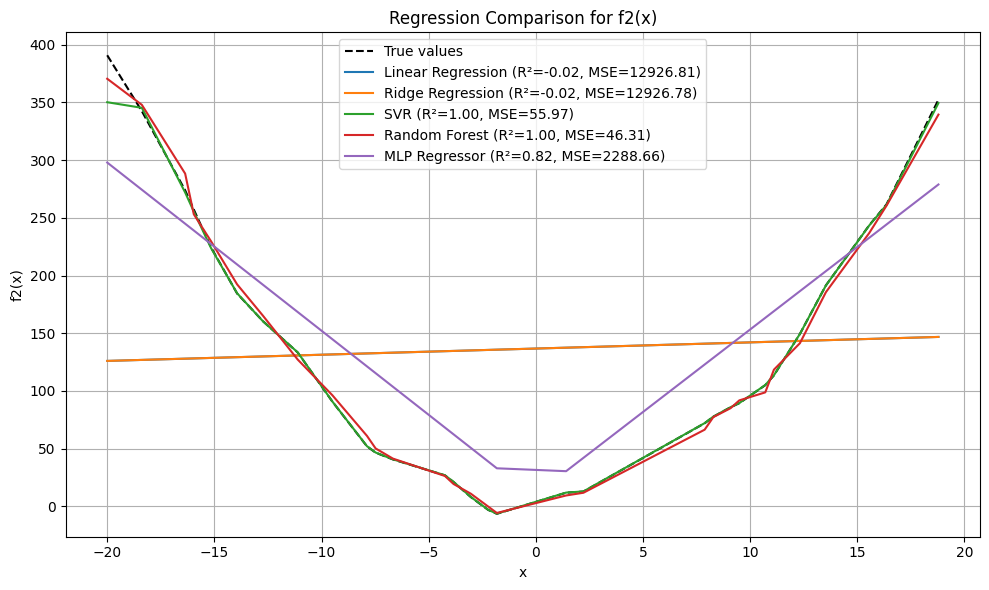


----- Function f3 -----


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


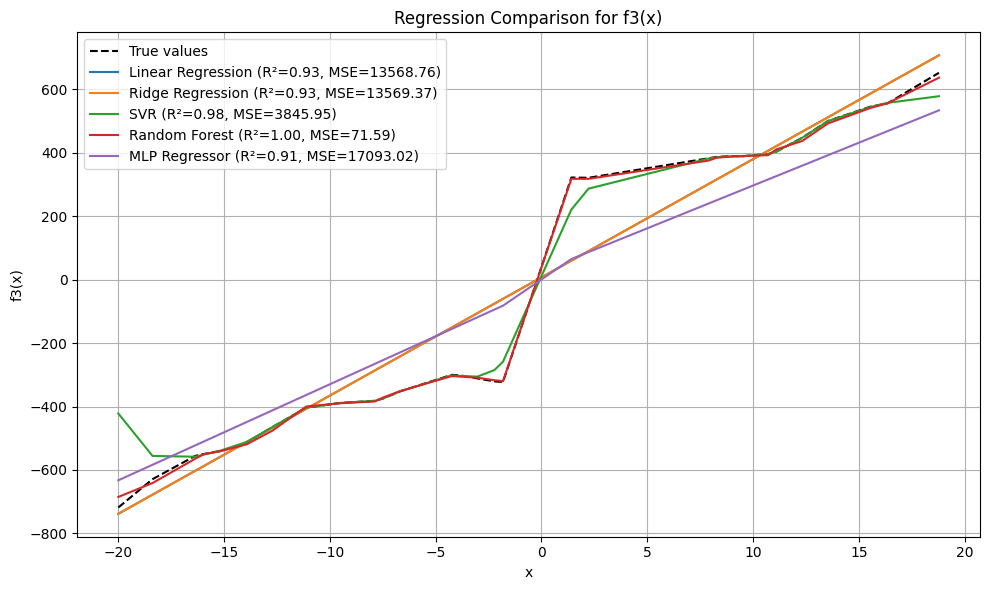

In [3]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "SVR": SVR(kernel='rbf', C=100, gamma=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
}

# Evaluate models on each function
for i, f in enumerate([f1, f2, f3], 1):
    print(f"\n----- Function f{i} -----")
    X_train, X_test, y_train, y_test, X_full, y_full = generate_dataset(f)

    plt.figure(figsize=(10, 6))
    plt.plot(X_test, y_test, label="True values", color='black', linestyle='--')

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        plt.plot(X_test, y_pred, label=f"{name} (R²={r2:.2f}, MSE={mse:.2f})")

    plt.title(f"Regression Comparison for f{i}(x)")
    plt.xlabel("x")
    plt.ylabel(f"f{i}(x)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


----- Function f1 with Feature Engineering -----
R² Score: 0.9690
MSE: 16.4800


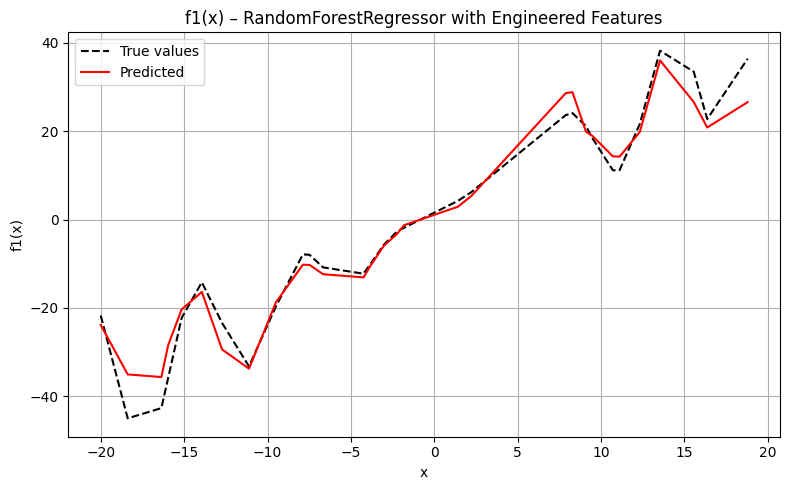


----- Function f2 with Feature Engineering -----
R² Score: 1.0000
MSE: 0.0449


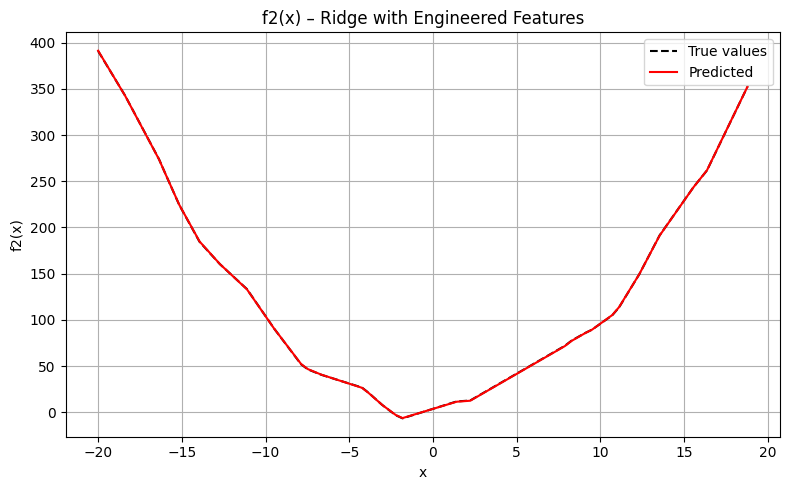


----- Function f3 with Feature Engineering -----
R² Score: 0.9994
MSE: 120.5223


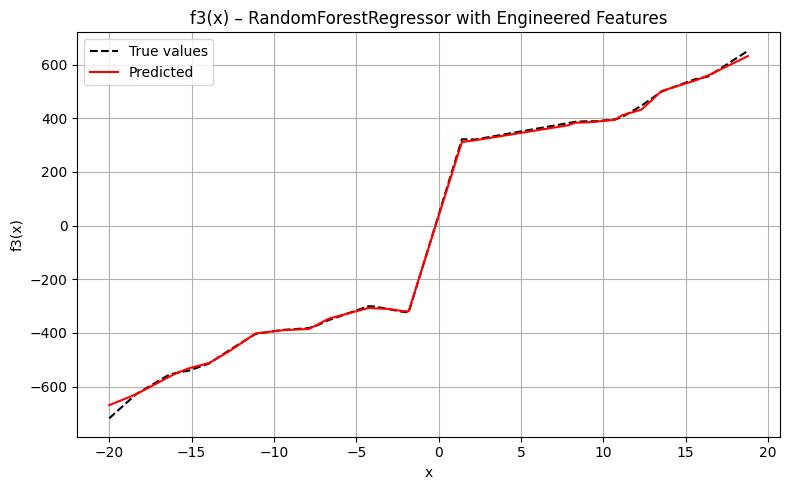

In [4]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

def add_features(X):
    x = X.ravel()
    return np.column_stack([
        x,
        x**2,
        np.sin(x),
        np.cos(x),
        x**3,
        x * np.sin(x),
    ])

feature_engineer = FunctionTransformer(add_features)

best_models = {
    1: RandomForestRegressor(n_estimators=100, random_state=42),
    2: Ridge(alpha=1.0),
    3: RandomForestRegressor(n_estimators=100, random_state=42)
}

for i, f in enumerate([f1, f2, f3], 1):
    print(f"\n----- Function f{i} with Feature Engineering -----")
    X_train, X_test, y_train, y_test, _, _ = generate_dataset(f)

    X_train_enh = add_features(X_train)
    X_test_enh = add_features(X_test)

    model = best_models[i]
    model.fit(X_train_enh, y_train)
    y_pred = model.predict(X_test_enh)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"R² Score: {r2:.4f}")
    print(f"MSE: {mse:.4f}")

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(X_test, y_test, 'k--', label='True values')
    plt.plot(X_test, y_pred, 'r-', label='Predicted')
    plt.title(f'f{i}(x) – {type(model).__name__} with Engineered Features')
    plt.xlabel("x")
    plt.ylabel(f"f{i}(x)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


----- Function f1 with NOISE -----
R² Score with Noise: -0.4977
MSE with Noise: 4529.5922


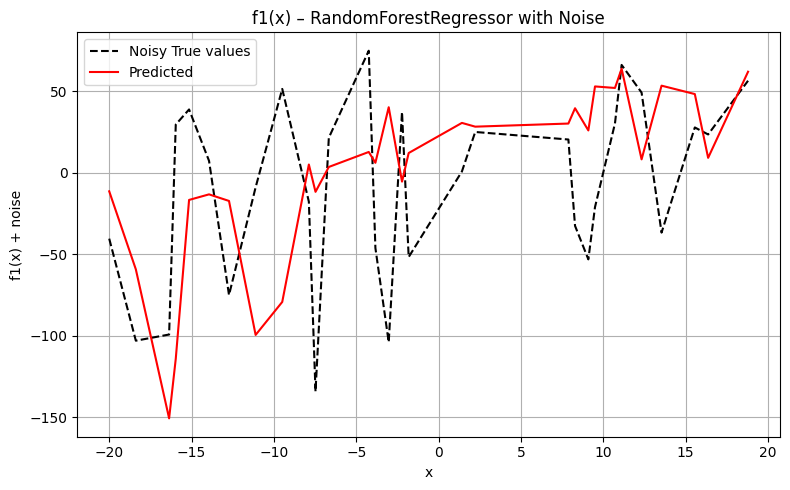


----- Function f2 with NOISE -----
R² Score with Noise: 0.7979
MSE with Noise: 3343.5602


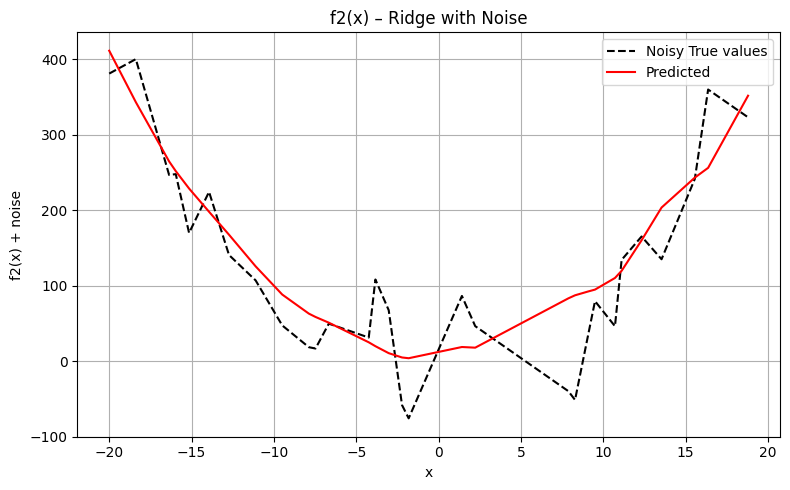


----- Function f3 with NOISE -----
R² Score with Noise: 0.9871
MSE with Noise: 2668.5252


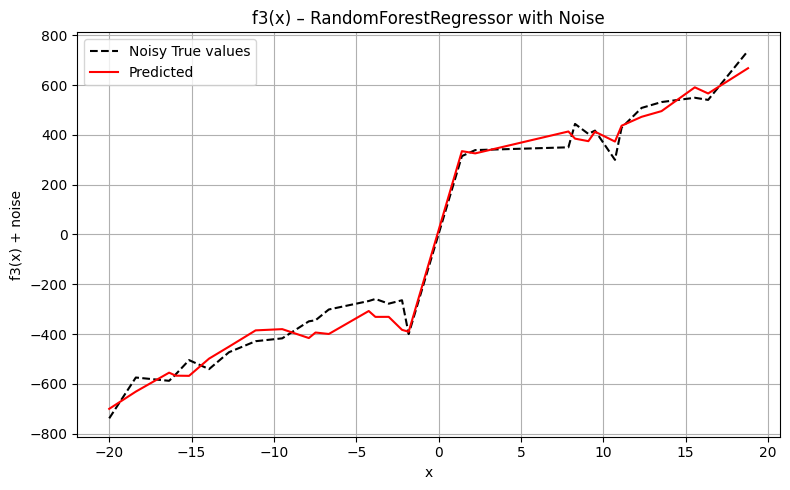

In [5]:
def inject_noise(y):
    return y + np.random.normal(0, 50, size=y.size)

for i, f in enumerate([f1, f2, f3], 1):
    print(f"\n----- Function f{i} with NOISE -----")
    X_train, X_test, y_train, y_test, _, _ = generate_dataset(f)

    y_train_noisy = inject_noise(y_train)
    y_test_noisy = inject_noise(y_test)

    X_train_enh = add_features(X_train)
    X_test_enh = add_features(X_test)

    model = best_models[i]
    model.fit(X_train_enh, y_train_noisy)
    y_pred_noisy = model.predict(X_test_enh)

    r2 = r2_score(y_test_noisy, y_pred_noisy)
    mse = mean_squared_error(y_test_noisy, y_pred_noisy)

    print(f"R² Score with Noise: {r2:.4f}")
    print(f"MSE with Noise: {mse:.4f}")

    plt.figure(figsize=(8, 5))
    plt.plot(X_test, y_test_noisy, 'k--', label='Noisy True values')
    plt.plot(X_test, y_pred_noisy, 'r-', label='Predicted')
    plt.title(f'f{i}(x) – {type(model).__name__} with Noise')
    plt.xlabel("x")
    plt.ylabel(f"f{i}(x) + noise")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [6]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

X, y = make_regression(n_samples=2000, n_features=10, n_informative=10, noise=0.0, random_state=42)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (2000, 10)
Shape of y: (2000,)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"\n{name}")
    print(f"R² Score: {r2:.4f}")
    print(f"MSE: {mse:.4f}")


Linear Regression
R² Score: 1.0000
MSE: 0.0000

Ridge Regression
R² Score: 1.0000
MSE: 0.0203

Random Forest
R² Score: 0.8535
MSE: 5816.9431



--- Linear Regression on Noisy, Partially Informative Data ---
R² Score: 0.8570
MSE: 2807.4057


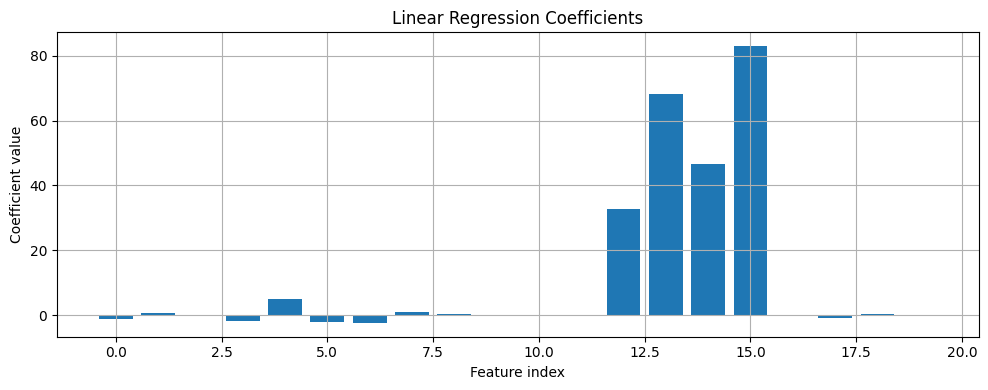

In [8]:
X_hard, y_hard = make_regression(
    n_samples=2000,
    n_features=20,
    n_informative=5,
    noise=50,
    random_state=42
)

Xh_train, Xh_test, yh_train, yh_test = train_test_split(X_hard, y_hard, train_size=0.7, random_state=42)

lr = LinearRegression()
lr.fit(Xh_train, yh_train)
yh_pred = lr.predict(Xh_test)

print("\n--- Linear Regression on Noisy, Partially Informative Data ---")
print(f"R² Score: {r2_score(yh_test, yh_pred):.4f}")
print(f"MSE: {mean_squared_error(yh_test, yh_pred):.4f}")

plt.figure(figsize=(10, 4))
plt.bar(range(len(lr.coef_)), lr.coef_)
plt.title("Linear Regression Coefficients")
plt.xlabel("Feature index")
plt.ylabel("Coefficient value")
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
pip install kaggle

In [10]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"artinahmeti","key":"00074485212c8f9bb0051fe25bead9e1"}'}

In [14]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [15]:
!kaggle datasets download -d smid80/weatherww2

Dataset URL: https://www.kaggle.com/datasets/smid80/weatherww2
License(s): U.S. Government Works
  0% 0.00/1.65M [00:00<?, ?B/s]
100% 1.65M/1.65M [00:00<00:00, 751MB/s]


In [16]:
!unzip weatherww2.zip

Archive:  weatherww2.zip
  inflating: Summary of Weather.csv  
  inflating: Weather Station Locations.csv  


<ipython-input-17-9655369cdd33>:5: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Summary of Weather.csv")


Initial shape: (119040, 31)
Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

Top 10 sensors by data availability:
STA
22508    2192
10701    2185
22502    2154
22504    2118
10803    1750
11610    1631
16405    1622
11601    1604
10502    1527
11604    1514
Name: MeanTemp, dtype: int64


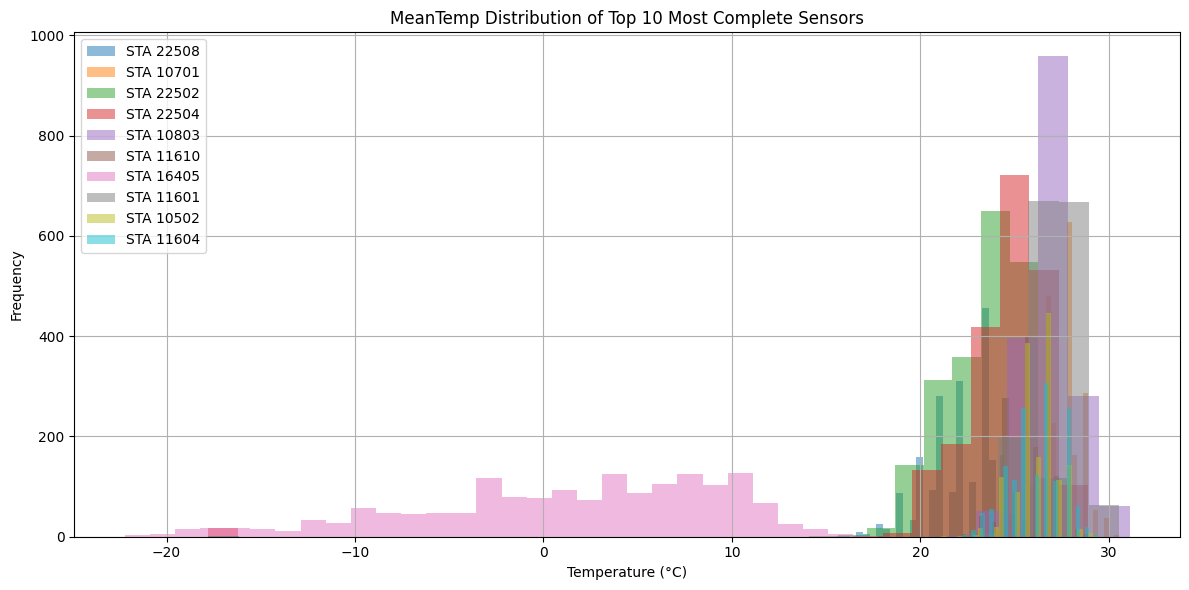

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Summary of Weather.csv")

print("Initial shape:", df.shape)
print(df.columns)

# Step 2.1: Check missing values in MeanTemp per STA
sensor_counts = df.groupby("STA")["MeanTemp"].count().sort_values(ascending=False)
top_10_sensors = sensor_counts.head(10)
print("\nTop 10 sensors by data availability:")
print(top_10_sensors)

# Plot distributions for top 10 sensors
plt.figure(figsize=(12, 6))
for i, sta in enumerate(top_10_sensors.index):
    subset = df[df["STA"] == sta]["MeanTemp"].dropna()
    plt.hist(subset, bins=30, alpha=0.5, label=f"STA {sta}")

plt.title("MeanTemp Distribution of Top 10 Most Complete Sensors")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 3: Filter for sensor 22508
sensor_df = df[df["STA"] == 22508][["Date", "MeanTemp"]].dropna()

sensor_df["Date"] = pd.to_datetime(sensor_df["Date"])
sensor_df = sensor_df.sort_values("Date")

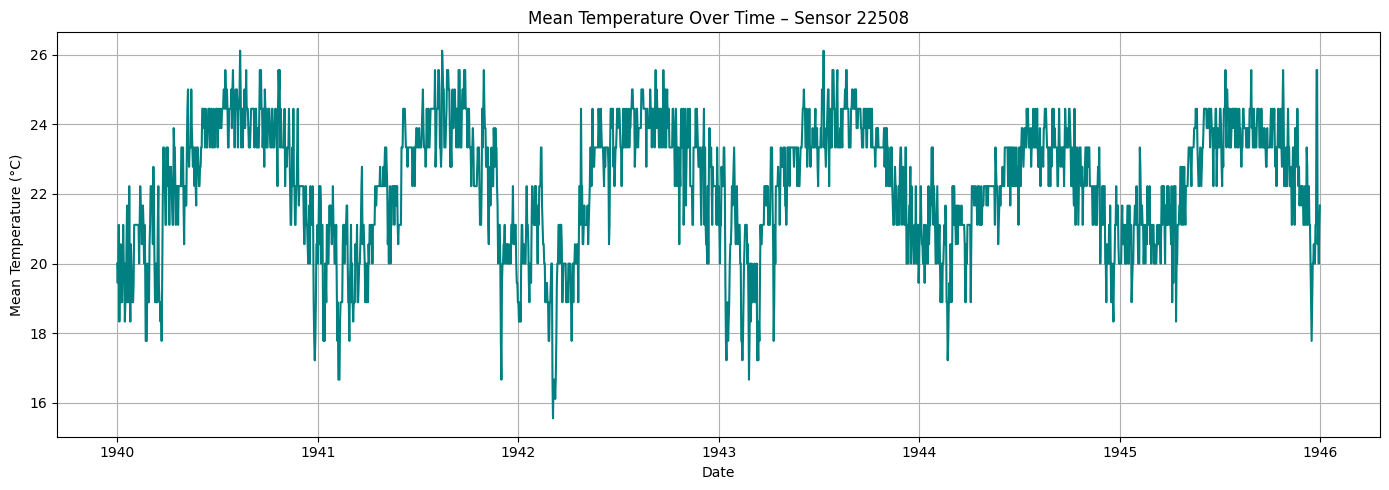

In [18]:
# Step 4: Time series plot
plt.figure(figsize=(14, 5))
plt.plot(sensor_df["Date"], sensor_df["MeanTemp"], color='teal')
plt.title("Mean Temperature Over Time – Sensor 22508")
plt.xlabel("Date")
plt.ylabel("Mean Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
def create_rolling_window_dataset(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size - 1):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size])
    return np.array(X), np.array(y)

In [20]:
W = 7  # Use last 7 days to predict the next day

temps = sensor_df["MeanTemp"].values
X, y = create_rolling_window_dataset(temps, window_size=W)

print("Feature shape (X):", X.shape)
print("Target shape (y):", y.shape)

Feature shape (X): (2184, 7)
Target shape (y): (2184,)


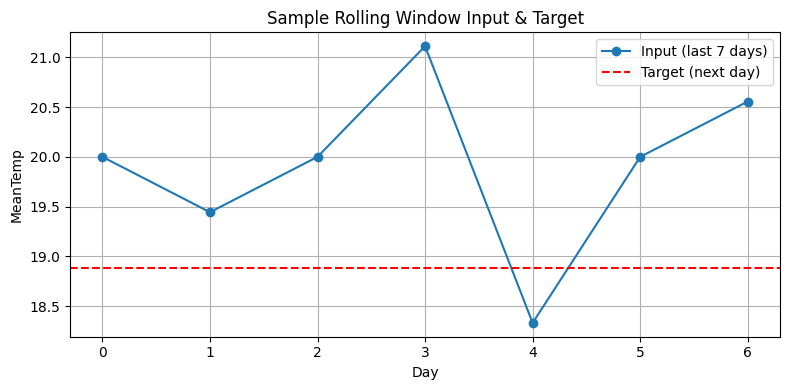

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

plt.figure(figsize=(8, 4))
plt.plot(range(W), X_train[0], marker='o', label='Input (last 7 days)')
plt.axhline(y=y_train[0], color='r', linestyle='--', label='Target (next day)')
plt.title("Sample Rolling Window Input & Target")
plt.xlabel("Day")
plt.ylabel("MeanTemp")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
sensor_df["Date"] = pd.to_datetime(sensor_df["Date"])
sensor_df = sensor_df.sort_values("Date")

train_df = sensor_df[(sensor_df["Date"] >= "1940-01-01") & (sensor_df["Date"] < "1945-01-01")]
test_df  = sensor_df[(sensor_df["Date"] >= "1945-01-01")]

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

W = 7
X_train, y_train = create_rolling_window_dataset(train_df["MeanTemp"].values, W)
X_test, y_test   = create_rolling_window_dataset(test_df["MeanTemp"].values, W)

In [23]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"\n{name}")
    print(f"R² Score: {r2:.4f}")
    print(f"MSE: {mse:.4f}")


Linear Regression
R² Score: 0.6796
MSE: 0.7452

Ridge Regression
R² Score: 0.6796
MSE: 0.7451

Random Forest
R² Score: 0.6391
MSE: 0.8392


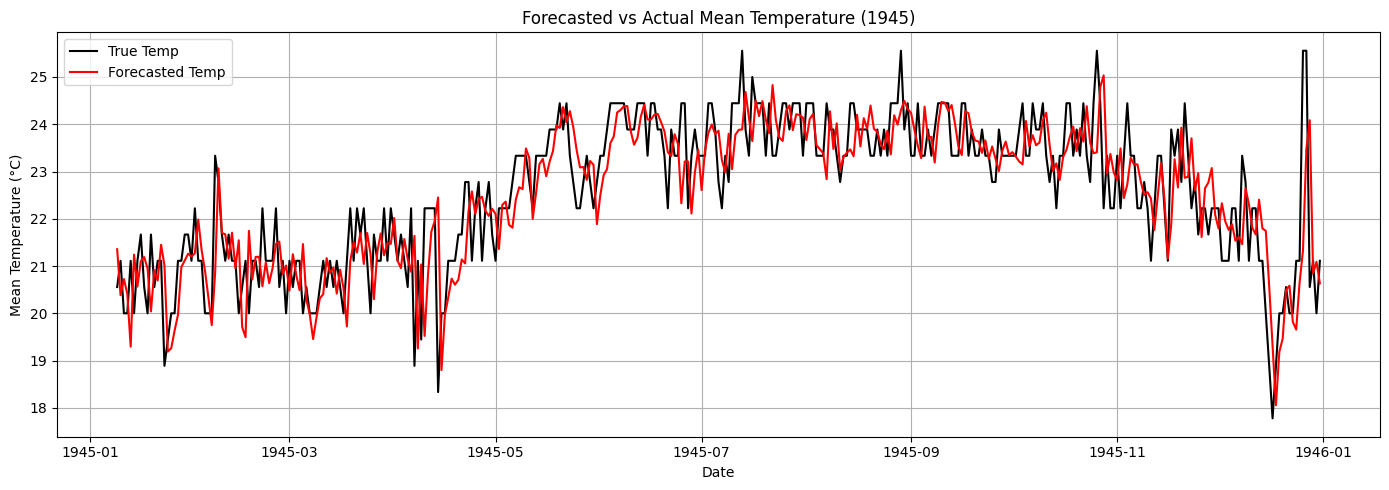

In [24]:
import matplotlib.pyplot as plt

best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

aligned_dates = test_df["Date"].values[W + 1:]

plt.figure(figsize=(14, 5))
plt.plot(aligned_dates, y_test, label="True Temp", color='black')
plt.plot(aligned_dates, y_pred, label="Forecasted Temp", color='red')
plt.title("Forecasted vs Actual Mean Temperature (1945)")
plt.xlabel("Date")
plt.ylabel("Mean Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
for train_idx, test_idx in tscv.split(X):
    X_tr, X_te = X[train_idx], X[test_idx]
    y_tr, y_te = y[train_idx], y[test_idx]
    model.fit(X_tr, y_tr)
    print("Fold R²:", r2_score(y_te, model.predict(X_te)))

Fold R²: 0.7585408895922123
Fold R²: 0.75409018627786
Fold R²: 0.7429782945029028
Fold R²: 0.6120554904796561
Fold R²: 0.6486612590495122


In [28]:
# Try W=14 and reduced complexity Random Forest
W_new = 14  # changed from 7 to 14

# Create new datasets
X_train_14, y_train_14 = create_rolling_window_dataset(train_df["MeanTemp"].values, W_new)
X_test_14, y_test_14   = create_rolling_window_dataset(test_df["MeanTemp"].values, W_new)

# Change model hyperparameters
model_rf_tuned = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
model_rf_tuned.fit(X_train_14, y_train_14)
y_pred_14 = model_rf_tuned.predict(X_test_14)

r2_14 = r2_score(y_test_14, y_pred_14)
mse_14 = mean_squared_error(y_test_14, y_pred_14)

print("Random Forest (W=14, n_estimators=50, max_depth=5):")
print(f"R² Score: {r2_14:.4f}")
print(f"MSE: {mse_14:.4f}")

Random Forest (W=14, n_estimators=50, max_depth=5):
R² Score: 0.6787
MSE: 0.7344
